__HOMEWORK 9__
<br>
Full Name: Nguyễn Thị Minh Ngọc
<br>
Student ID: 11219280
<br>
Class: DSEB 63

In [1]:
import re

## Exercise 1

In [2]:
file = "../data/data.html"
with open(file, encoding = "utf8") as f:
    txt = f.read()

In [3]:
trial = re.findall('>([PGSTHSCN].*|\w+.*)</p>', txt)
trial = trial[1:-7:]
for i in range(len(trial)):
    if '</a>' in trial[i]:
        trial[i] = trial[i].replace('</a>','')
    if '</strong>' in trial[i]:
        trial[i] = trial[i].replace('</strong>','')
    if '<p>' in trial[i]:
        trial[i] = trial[i].replace('<p>','')
    if '</span>' in trial[i]:
        trial[i] = trial[i].replace('</span>','')
    if trial[i] == 'Bộ môn Toán kinh tế':
        trial[i] = 'TKT'
    elif trial[i] == 'Bộ môn Toán cơ bản':
        trial[i] = 'TCB'
    elif trial[i] == 'Bộ môn Toán tài chính':
        trial[i] = 'TTC'
# print(*trial, sep = '\n')
for i in trial:
    if i != i.upper():
        trial.remove(i)
trial_list = []
for i in range(0,len(trial),2):
    temp = []
    temp.append(trial[i])
    temp.append(trial[i+1])
    trial_list.append(temp)
# trial
# print(*trial_list, sep = '\n')

In [4]:
sample = re.findall(r">(\w.*</span>|\w.*</td>)", txt)
sample = sample[21::]
teachers_all = []
for i in range(len(sample)):
    if '</strong>' in sample[i]:
        temp = re.findall('(\w.+)</strong>', sample[i])
        sample[i] = temp[0]
    if '</span>' in sample[i]:
        sample[i] = sample[i].replace('</span>', '')
    if '</td>' in sample[i]:
        sample[i] = sample[i].replace('</td>', '')
# print(sample.index('43-56'))
del sample[306:312:]
# print(*sample, sep = '\n')

teachers_all = []
for i in range(len(sample)):
    if (sample[i].isnumeric() == False and sample[i] != 'Nữ'):
        if sample[i-1].isnumeric() == True or sample[i+1] == 'Nữ':
            teachers_all.append(sample[i])
names_temp = []
subjects_temp = []
for i in range(len(teachers_all)):
    if i%2 == 0:
        names_temp.append(teachers_all[i])
    else:
        subjects_temp.append(teachers_all[i])

In [5]:
#Step 1
teachers_current = []
start = 0
for i in range(len(sample)):
    if sample[i-1] in subjects_temp and i-1 != -1:
        if sample[i].isnumeric() == False:
            start = i+1
        else:
            teachers_current.append(sample[start:i:])
            start = i
    if i == len(sample)-1 and sample[i] in subjects_temp:
        teachers_current.append(sample[start:i+1:])
# print(*teachers_current, sep = '\n')

#Step 2
for i in teachers_current:
    temp = re.findall('\w+.(\w+\s\w+$)', i[1])
    i.extend(temp)
    last_temp = re.findall('^(\w+)', i[1])
    last_temp_first = re.findall('^(\w\w)', i[1])
    i.extend(last_temp)
    i.extend(last_temp_first)
# print(*teachers_current, sep = '\n')
# print(len(teachers_current))

#Step 3
teachers_final = []
for i in teachers_current:
    temp = []
    for i2 in trial_list:
        if i[-3].upper() in i2[0] and i[-2].upper() in i2 or i[-3].upper() in i2[0] and i[-1].upper() in i2[0]:
            name_temp = i2[0].split('. ', 1)
            temp.append(name_temp[0])
            temp[0] = f'{temp[0]}. {name_temp[1].title()}'
            temp.append(i2[1])
    if 'Nữ' in i:
        temp.append('Nữ')
    else:
        temp.append('Nam')
    temp.append(i[2])
    teachers_final.append(temp)

In [8]:
import pandas as pd
df_teachers = pd.DataFrame(teachers_final,columns = ["Full name","Subject","Gender","Year of birth"])
df_teachers

,Full name,Subject,Gender,Year of birth
0,TS. Nguyễn Mạnh Thế,TKT,Nam,1975
1,THS. Trần Chung Thủy,TTC,Nữ,1974
2,THS. Phạm T. Hương Huyền,TKT,Nữ,1976
3,THS. Hoàng T. Thanh Tâm,TKT,Nữ,1973
4,THS. Vũ Quỳnh Anh,TCB,Nữ,1975
5,THS. Bùi Dương Hải,TKT,Nam,1976
6,THS. Nguyễn Phương Lan,TCB,Nữ,1976
7,THS. Phạm Anh Tuấn,TCB,Nam,1963
8,THS. Nguyễn Hải Dương,TKT,Nam,1979
9,THS. Lê Đức Hoàng,TKT,Nam,1979


## Exercise 2 + Exercise 3

In [9]:
#Calculating age
for i in teachers_final:
    age = 2022 - int(i[-1])
    i.append(age)
# print(*teachers_final, sep = '\n')

#Increasing Order by Age
for i in range(len(teachers_final)):
    for i2 in range(i+1, len(teachers_final)):
        if teachers_final[i][-1] > teachers_final[i2][-1]:
            temp = teachers_final[i]
            teachers_final[i] = teachers_final[i2]
            teachers_final[i2] = temp

In [11]:
import matplotlib.pyplot as plt

### Ex2 - a

In [12]:
#Ex2 - a
mean_a = sum(i[-1] for i in teachers_final)/len(teachers_final)
if len(teachers_final)%2 == 0:
    index = int(len(teachers_final)/2) - 1
    median_a = (teachers_final[index][-1]+teachers_final[index+1][-1])/2
else:
    index = int(len(teachers_final)//2) - 1 + 1
    median_a = teachers_final[index][-1]
print(f'Mean = {mean_a}\nMedian = {median_a}')

Mean = 41.74418604651163
Median = 42


### Ex3 - a

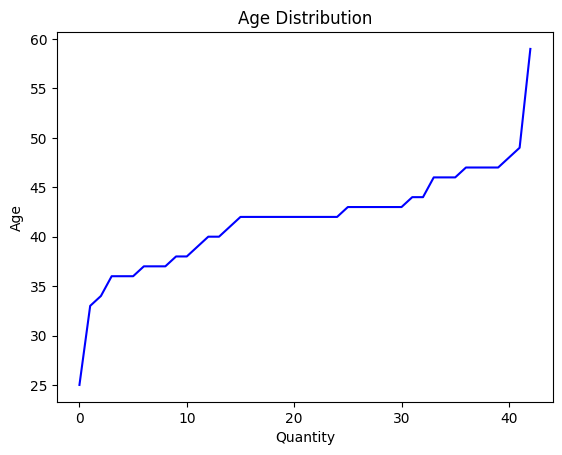

In [13]:
#Ex3 - a
age = []
for i in teachers_final:
    age.append(i[-1])
    
fig, ax = plt.subplots()
ax.plot(age, label = None, color='blue')
plt.xlabel('Quantity')
plt.ylabel('Age')
plt.title('Age Distribution')
plt.show()

### Ex2 - b

In [14]:
#Ex2 - b
teachers_gender = [['Nữ'], ['Nam']]
male = []
female = []
print('Theo giới tính:')
for i in teachers_final:
    if i[2] == 'Nữ':
        female.append(i[-1])
    else:
        male.append(i[-1])
teachers_gender[0].append(female)
teachers_gender[1].append(male)
for i in teachers_gender:
    print(f'\n>>> {i[0]}')
    mean_b = sum(i2 for i2 in i[1])/len(i[1])
    if len(i[1])%2 == 0:
        index = int(len(i[1])/2) - 1
        median_b = (i[1][index] + i[1][index+1])/2
    else:
        index = int(len(i[1])//2) - 1 + 1
        median_b = i[1][index]
    print(f'Mean = {mean_b}\nMedian = {median_b}')

Theo giới tính:

>>> Nữ
Mean = 41.333333333333336
Median = 42

>>> Nam
Mean = 42.13636363636363
Median = 42.0


### Ex3 - b

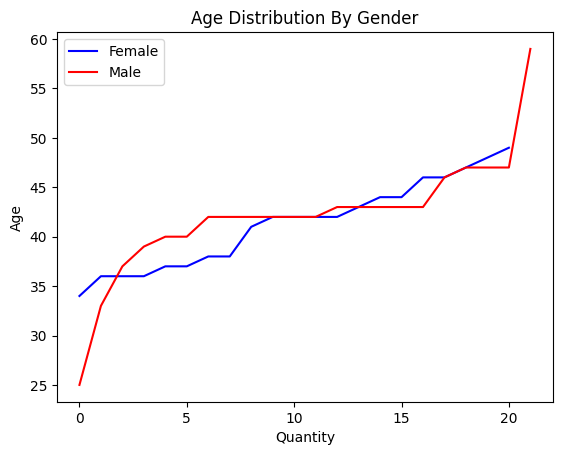

In [15]:
#Ex3 - b
fig, ax = plt.subplots()
ax.plot(teachers_gender[0][1], label='Female', color='blue')
ax.plot(teachers_gender[1][1], label='Male', color = 'red')
legend = ax.legend()
plt.xlabel('Quantity')
plt.ylabel('Age')
plt.title('Age Distribution By Gender')
plt.show()

### Ex2-c

In [16]:
#Ex2 - c
teachers_sub = [['TKT'], ['TTC'], ['TCB']]
tkt = []
ttc = []
tcb = []
print('Theo bộ môn:')
for i in teachers_final:
    if i[1] == 'TKT':
        tkt.append(i[-1])
    elif i[1] == 'TTC':
        ttc.append(i[-1])
    else:
        tcb.append(i[-1])
teachers_sub[0].append(tkt)
teachers_sub[1].append(ttc)
teachers_sub[2].append(tcb)
for i in teachers_sub:
    print(f'\n>>> {i[0]}')
    mean_c = sum(i2 for i2 in i[1])/len(i[1])
    if len(i[1])%2 == 0:
        index = int(len(i[1])/2) - 1
        median_c = (i[1][index] + i[1][index+1])/2
    else:
        index = int(len(i[1])//2) - 1 + 1
        median_c = i[1][index]
    print(f'Mean = {mean_c}\nMedian = {median_c}')

Theo bộ môn:

>>> TKT
Mean = 40.73684210526316
Median = 42

>>> TTC
Mean = 40.8
Median = 42

>>> TCB
Mean = 43.0
Median = 42


### Ex3 - c

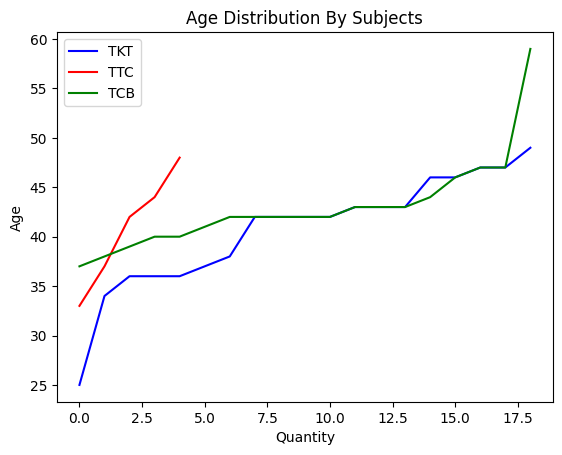

In [17]:
#Ex3 - c
fig, ax = plt.subplots()
ax.plot(teachers_sub[0][1], label='TKT', color = 'blue')
ax.plot(teachers_sub[1][1], label='TTC', color = 'red')
ax.plot(teachers_sub[2][1], label='TCB', color = 'green')
legend = ax.legend()
plt.xlabel('Quantity')
plt.ylabel('Age')
plt.title('Age Distribution By Subjects')
plt.show()

### Ex2 - d

In [18]:
#Ex2 - d
teachers_gender_temp = [['Nữ'], ['Nam']]
male = []
female = []
for i in teachers_final:
    if i[2] == 'Nữ':
        female.append(i)
    else:
        male.append(i)
teachers_gender_temp[0].append(female)
teachers_gender_temp[1].append(male)

teachers_gen_sub = [['Nữ', [['TKT'], ['TTC'], ['TCB']]], ['Nam', [['TKT'], ['TTC'], ['TCB']]]]
for i in range(len(teachers_gender_temp)):
    tkt2 = []
    ttc2 = []
    tcb2 = []
    for i2 in teachers_gender_temp[i][1]:
#         print(i2)
        if i2[1] == 'TKT':
            tkt2.append(i2[-1])
        elif i2[1] == 'TTC':
            ttc2.append(i2[-1])
        else:
            tcb2.append(i2[-1])
#     print(tkt2)
    teachers_gen_sub[i][1][0].append(tkt2)
    teachers_gen_sub[i][1][1].append(ttc2)
    teachers_gen_sub[i][1][2].append(tcb2)
# print(teachers_gen_sub)
for i in teachers_gen_sub:
    print(i[0])
    for i2 in i[1]:
        print(f'>>> {i2[0]}')
        if i2[1]:
            if len(i2)>1:
                mean_c = sum(i3 for i3 in i2[1])/len(i2[1])
                if len(i2[1])%2 == 0:
                    index = int(len(i2[1])/2) - 1
                    median_c = (i2[1][index] + i2[1][index+1])/2
                else:
                    index = int(len(i2[1])//2) - 1 + 1
                    median_c = i2[1][index]
            else:
                mean_c = i2[1][0]
                median_c = i2[1][0]
            print(f'\tMean = {mean_c}\n\tMedian = {median_c}')
        else:
            print("None")

Nữ
>>> TKT
	Mean = 40.2
	Median = 40.0
>>> TTC
	Mean = 43.0
	Median = 44
>>> TCB
	Mean = 42.125
	Median = 42.0
Nam
>>> TKT
	Mean = 41.333333333333336
	Median = 43
>>> TTC
	Mean = 37.5
	Median = 37.5
>>> TCB
	Mean = 43.63636363636363
	Median = 42


### Ex3 - d

In [19]:
#Ex3 - d
tkt_df = [teachers_gen_sub[0][1][0][1], teachers_gen_sub[1][1][0][1]]
ttc_df = [teachers_gen_sub[0][1][1][1], teachers_gen_sub[1][1][1][1]]
tcb_df = [teachers_gen_sub[0][1][2][1], teachers_gen_sub[1][1][2][1]]
df = pd.DataFrame({'Gender': ['Nữ', 'Nam'],
                   'TKT': tkt_df,
                   'TTC': ttc_df,
                   'TCB': tcb_df})
df

,Gender,TKT,TTC,TCB
0,Nữ,"[34, 36, 36, 36, 38, 42, 42, 43, 46, 49]","[37, 44, 48]","[37, 38, 41, 42, 42, 44, 46, 47]"
1,Nam,"[25, 37, 42, 42, 43, 43, 46, 47, 47]","[33, 42]","[39, 40, 40, 42, 42, 42, 43, 43, 43, 47, 59]"
